<a href="https://colab.research.google.com/github/Garima2505/ML-6123-project/blob/main/Colorization_w_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

In [ ]:
"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names

In [ ]:
path = 'C:\\Users\\ahmtg\\content'
ytr,a2,a3,yts,a5,a6,a7 = load_cifar_10_data(path)
print(ytr.shape)

(50000, 32, 32, 3)


In [ ]:
from skimage.color import rgb2gray
xtr = rgb2gray(ytr) # convert color images to gray scale
xts = rgb2gray(yts) # convert color images to gray scale
xts[0,0,25]

0.4135482352941176

In [ ]:
ali = xts
ns, nrow = xts.shape[0:2]
mean = np.zeros(ali.shape)
var_x = np.zeros(ali.shape)
var_y = np.zeros(ali.shape)
ali.shape
print(ns,nrow)
np.mean(mean)

10000 32


0.0

In [ ]:
for k in range(ns):
  for i in range(nrow-1):
    for j in range(nrow-1):
        idx = [ali[k,i-1,j] , ali[k,i+1,j] , ali[k,i,j-1] , ali[k,i,j+1], ali[k,i-1,j-1]*0.707 , ali[k,i+1,j+1]*0.707 , ali[k,i+1,j-1]*0.707 , ali[k,i-1,j+1]*0.707]
        mean[i,j] = np.mean(idx)
        var_x[k,i,j] = ali[k,i,j-1] - ali[k,i,j+1] + (ali[k,i+1,j-1] + ali[k,i-1,j-1] - ali[k,i+1,j+1] - ali[k,i-1,j+1])*0.707
        var_y[k,i,j] = ali[k,i-1,j] - ali[k,i+1,j] + (ali[k,i-1,j-1] + ali[k,i-1,j+1] - ali[k,i+1,j+1] - ali[k,i-1,j+1])*0.707

print(mean.shape,var_x.shape,var_y.shape)        

(10000, 32, 32) (10000, 32, 32) (10000, 32, 32)


In [ ]:
var_y.shape
xts.shape
newx = xtr.reshape(50000, 1024)
#vary = var_y.reshape(10000, 1024)

In [ ]:
m_dx_dy = np.concatenate((newx[None,:],vary[None,:]), axis = 0)
#m_dx_dy = np.concatenate((newx[None,:],mean[None,:],var_x[None,:],var_y[None,:]), axis = 0)

x_w_mean_dfx_dfy = m_dx_dy.reshape(10000, 1024*2)
yyy = yts.reshape(10000, 1024*3)


print(yyy.shape,x_w_mean_dfx_dfy.shape)
#print(ylast.shape,xlast.shape)
print(np.mean(mean))

(10000, 3072) (10000, 2048)
0.0


In [ ]:
yyy = ytr.reshape(50000, 1024*3)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
# Fit
regalphaone = Lasso(alpha=0.1)

regalphaone.fit(newx, yyy)
yhat = regalphaone.predict(newx)

In [ ]:
yhatq = yhat.reshape(50000, 32, 32, 3)
yhatq.shape

(50000, 32, 32, 3)

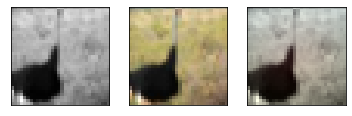

In [ ]:
real = ytr[121,:,:,:]
pred = yhatq[121,:,:,:]
bw = xtr[121,:,:]

plt.subplot(1,3,1)
disp_image(bw)
plt.subplot(1,3,2)
disp_image(real)
plt.subplot(1,3,3)
disp_image(pred)

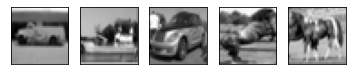

In [ ]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(xtr[110+i,:,:])

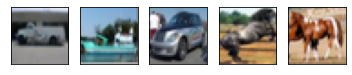

In [ ]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(ytr[110+i,:,:,:])

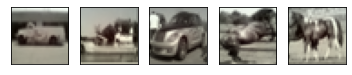

In [ ]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(yhatq[110+i,:,:,:])

In [ ]:
r2_score(yhat , yyy)

0.883251396347306

In [ ]:
xtest = xts.reshape(10000, 32*32)
ytest = yts.reshape(10000, 32*32*3)

In [ ]:
yhat = regalphaone.predict(xtest)
r2_score(yhat , ytest)

0.8821116420969831

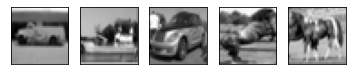

In [ ]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(xtr[110+i,:,:])

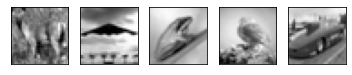

In [ ]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(xts[110+i,:])

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regalphaone, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model
result.predict(xtest)
r2_score(ytest , yhat)

0.9017071763909931

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
reg_ls = Ridge(alpha=0.1)

In [ ]:
reg_ls.fit(newx, yyy)

Ridge(alpha=0.1)

In [ ]:
yhat1 = reg_ls.predict(xtest)
rsq = r2_score(ytest, yhat1)
print('Test R^2     = %f' % rsq)
r2_score(ytest , yhat1)

Test R^2     = 0.900141


0.9001413278472589

In [ ]:
reg_rid = Ridge(alpha=1)
reg_rid.fit(newx, yyy)

Ridge(alpha=1)

In [ ]:
yhat2 = reg_rid.predict(xtest)
rsq = r2_score(ytest, yhat2)
print('Test R^2     = %f' % rsq)
r2_score(ytest , yhat2)

Test R^2     = 0.900241


0.9002408998015872

In [ ]:
# Create cross-validation object
from sklearn.model_selection import KFold
nfold = 10
kf =KFold(nfold, shuffle=True)

# Alpha values to test
alphas_ridge = np.logspace(-3,3,40)
alphas = np.logspace(-6,-1,40)

nalpha = len(alphas)

# Run the cross-validation
rsq = np.zeros((nalpha, nfold))
for ifold, ind in enumerate(kf.split(newx)):
        
    # Get the training data in the split
    Itr,Its = ind
    Xtr1 = newx[Itr,:]
    ytr1 = yyy[Itr,:]
    Xts1 = newx[Its,:]
    yts1 = yyy[Its,:]


    for i, alpha in enumerate(alphas_ridge):

        # Fit on the training data
        reg = Ridge(alpha=alpha)
        reg.fit(Xtr1, ytr1)

        # Score on the test data
        yhat1 = reg.predict(Xts1)
        rsq[i, ifold] = r2_score(yts1, yhat1)
    
    print('Fold = %d' % ifold)
    
# Compute mean and SE
rsq_ridge_mean = np.mean(rsq, axis=1)
rsq_ridge_se  = np.std(rsq, axis=1) / np.sqrt(nfold-1)

Fold = 0
Fold = 1
Fold = 2
Fold = 3
Fold = 4
Fold = 5
Fold = 6
Fold = 7
Fold = 8
Fold = 9


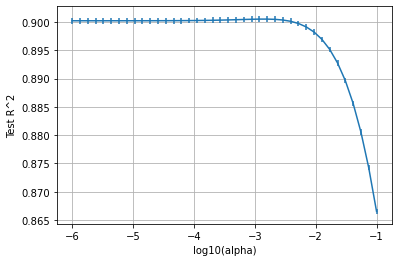

In [ ]:
plt.errorbar(np.log10(alphas), rsq_ridge_mean, yerr=rsq_ridge_se)
plt.xlabel('log10(alpha)')
plt.ylabel('Test R^2')
plt.grid()
plt.show()

In [ ]:
im = np.argmax(rsq_ridge_mean)
alpha_normal = alphas[im]
print('Alpha optimal (normal rule) = %12.4e' % alpha_normal)
print('Mean test R^2 (normal rule) = %7.3f' % rsq_ridge_mean[im])

Alpha optimal (normal rule) =   1.6037e-03
Mean test R^2 (normal rule) =   0.901


In [ ]:
reg_rid = Ridge(alpha=alpha_normal)
reg_rid.fit(newx, yyy)

Ridge(alpha=0.0016037187437513293)

In [ ]:
yhat2 = reg_rid.predict(xtest)
rsq = r2_score(ytest, yhat2)
#print('Test R^2     = %f' % rsq)
print('accuracy on new data',r2_score(ytest , yhat2))

accuracy on new data 0.9001270046401801


In [ ]:
yhat2 = reg_rid.predict(newx)
rsq = r2_score(yyy, yhat2)
#print('Train R^2     = %f' % rsq)
print('accuracy on trained data',r2_score(yyy , yhat2))

accuracy on trained data 0.904385284679507
